In [1]:
#匯入模組
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#匯入20200808爬蟲資料
parse_dates = ['time']
df = pd.read_csv('C:\\Users\\caac1\\Desktop\\中文分析\\御香屋\\review_20200808.txt', sep='\t', header=0, dtype=str)
df

,index,username,time,comment,star
0,0,林冠佑,NaN,None,5
1,1,Cian Wun Chen,NaN,去了三次都公休...\n是一間很容易公休的飲料店..,4
2,2,Kiam Hsu,20200807,葡萄柚綠新鮮好喝，不過應該是生意太好我們點了三杯也收了錢結果只給我們一杯，反應後補的兩杯也沒...,2
3,3,Ling C.,20200807,平常不特別愛喝含糖飲料\n但他們家的招牌葡萄柚果粒茶 \n真的是酷暑下的聖品啊！,4
4,4,陳有德,20200807,None,4
...,...,...,...,...,...
3995,5,陳園霖,20160808,None,5
3996,6,Tzu Lung Chang,20160808,None,3
3997,7,Richard Wang,20160808,喝過一次還不錯喝~~但是就是貴了點Orz,4
3998,8,Miffy Li,20160808,飲料調製恰到好處，各種飲料在屏幕上都有介紹其產地及口感，強調農產品皆符合標準，飲用更安心。,4


In [3]:
#檢視每個欄位資料是否有NULL、NoneType、None字串,若有以上狀況需檢視是否合理或不合理要進行處理
for col in list(df):
    if df[col].isnull().values.any() == True:
        print(col,'has NULL values:',df[col].isnull().values.any())
    if (df[col].values.any() is None) == True:
        print(col,'has NoneType:',df[col].values.any() is None)
    if (df[col].values.any() == 'None') == True:
        print(col,'has \'None\' string:',df[col].values.any() == 'None')

time has NULL values: True
comment has 'None' string: True


In [4]:
#time為NULL不合理,將time是None的資料轉換成當天(20200808)的日期
df['time'] = df['time'].replace(to_replace=[None],value='20200808')
df['time']

0       20200808
1       20200808
2       20200807
3       20200807
4       20200807
          ...   
3995    20160808
3996    20160808
3997    20160808
3998    20160808
3999    20160808
Name: time, Length: 4000, dtype: object

In [5]:
#用yyyymmdd來分析維度太細,將yyyymmdd轉換成yyyy與yyyymm
df['yyyy'] = df['time'].str[:4]
df['yyyymm'] = df['time'].str[:6]
df = df.reset_index()
df = df[['username', 'time', 'yyyy', 'yyyymm', 'comment', 'star']]
df

,username,time,yyyy,yyyymm,comment,star
0,林冠佑,20200808,2020,202008,None,5
1,Cian Wun Chen,20200808,2020,202008,去了三次都公休...\n是一間很容易公休的飲料店..,4
2,Kiam Hsu,20200807,2020,202008,葡萄柚綠新鮮好喝，不過應該是生意太好我們點了三杯也收了錢結果只給我們一杯，反應後補的兩杯也沒...,2
3,Ling C.,20200807,2020,202008,平常不特別愛喝含糖飲料\n但他們家的招牌葡萄柚果粒茶 \n真的是酷暑下的聖品啊！,4
4,陳有德,20200807,2020,202008,None,4
...,...,...,...,...,...,...
3995,陳園霖,20160808,2016,201608,None,5
3996,Tzu Lung Chang,20160808,2016,201608,None,3
3997,Richard Wang,20160808,2016,201608,喝過一次還不錯喝~~但是就是貴了點Orz,4
3998,Miffy Li,20160808,2016,201608,飲料調製恰到好處，各種飲料在屏幕上都有介紹其產地及口感，強調農產品皆符合標準，飲用更安心。,4


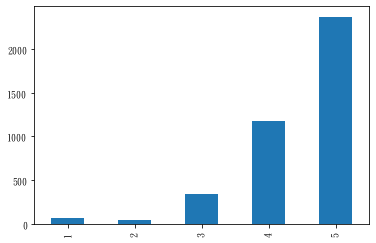

In [6]:
#檢視4000筆中各star數量
pd.value_counts(df['star'].values).sort_index().plot.bar()

[68, 46, 342, 1174, 2370]
[21, 11, 145, 429, 792]


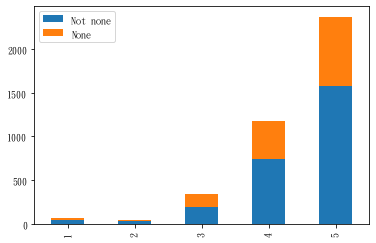

In [7]:
#各star的comment為None的比例,檢視每個star不為None與為None的比例
total_list = []
none_list = []
not_none_list = []

for i in range(1, 6):
    df_star = df[pd.to_numeric(df['star']) == i]
    total_list.append(df_star['star'].count())
    none_list.append(df_star['star'][df_star['comment']=='None'].count())

not_none_list = [m - n for m,n in zip(total_list,none_list)]

print(total_list)
print(none_list)

df_comment = pd.DataFrame({'Not none': not_none_list,'None': none_list}, index={1, 2, 3, 4, 5})

df_comment.plot.bar(stacked=True)

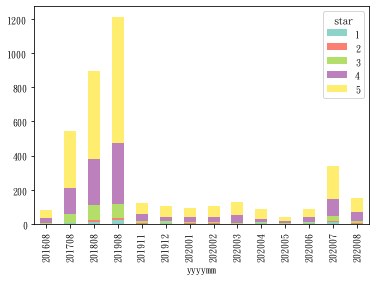

In [8]:
#觀察yyyymm的star數量，以yyyymm為x軸，star為y軸
df.groupby(['yyyymm', 'star']).size().unstack().plot(kind='bar', stacked=True, colormap='Set3')

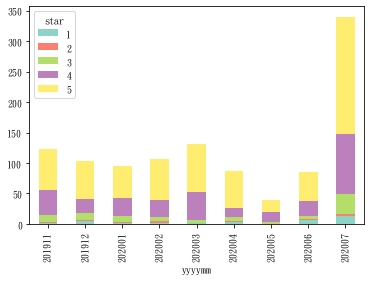

In [9]:
#因為時間在滿10個月但未2年前皆顯示為1年前,因此應該僅考慮九個月內的(即201911~202007)
#也不應該考慮當月,因為當月資料還不完整
df_recent = df[(df['yyyymm']>='201911') & (df['yyyymm']<='202007')]
df_recent.groupby(['yyyymm', 'star']).size().unstack().plot(kind='bar', stacked=True, colormap='Set3')